In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("acad.csv")

In [3]:
df

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2
...,...,...,...,...,...,...,...,...
4995,4995,4995,NaN,Female,212261,28.0,San Francisco,1
4996,4996,4996,NaN,Male,70228,12.0,San Francisco,0
4997,4997,4997,NaN,Male,64995,14.0,New York City,0
4998,4998,4998,NaN,Male,56144,4.0,New York City,2


In [4]:
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [5]:
df

,index,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2
...,...,...,...,...,...,...,...,...
4995,4995,4995,NaN,Female,212261,28.0,San Francisco,1
4996,4996,4996,NaN,Male,70228,12.0,San Francisco,0
4997,4997,4997,NaN,Male,64995,14.0,New York City,0
4998,4998,4998,NaN,Male,56144,4.0,New York City,2


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

index                  0
id                     0
age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64


In [13]:
df['age'].fillna(value= df['age'].mean())

0       30.202036
1       30.202036
2       24.000000
3       29.000000
4       18.000000
          ...    
4995    30.202036
4996    30.202036
4997    30.202036
4998    30.202036
4999    30.202036
Name: age, Length: 5000, dtype: float64

In [14]:
df

,index,id,age,gender,income,days_on_platform,city,purchases
0,0,0,30.202036,Male,126895,14.0,San Francisco,0
1,1,1,30.202036,Male,161474,14.0,Tokyo,0
2,2,2,24.000000,Male,104723,34.0,London,1
3,3,3,29.000000,Male,43791,28.0,London,2
4,4,4,18.000000,Female,132181,26.0,London,2
...,...,...,...,...,...,...,...,...
4995,4995,4995,30.202036,Female,212261,28.0,San Francisco,1
4996,4996,4996,30.202036,Male,70228,12.0,San Francisco,0
4997,4997,4997,30.202036,Male,64995,14.0,New York City,0
4998,4998,4998,30.202036,Male,56144,4.0,New York City,2


In [15]:
df.isnull().sum()

index                 0
id                    0
age                   0
gender                0
income                0
days_on_platform    141
city                  0
purchases             0
dtype: int64

In [20]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check unique values in categorical columns
unique_genders = df['gender'].unique()
unique_cities = df['city'].unique()

duplicate_rows


0

In [21]:
unique_genders


array(['Male', 'Female'], dtype=object)

In [22]:
unique_cities

array(['San Francisco', 'Tokyo', 'London', 'New York City', 'Miami'],
      dtype=object)

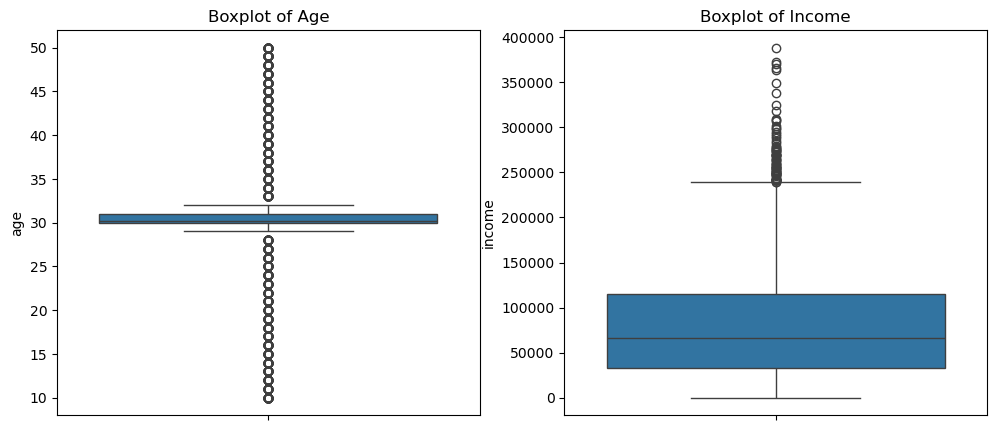

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for 'age' and 'income' to detect outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['income'])
plt.title('Boxplot of Income')

plt.show()


In [24]:
# Function to find outliers using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers in 'age' and 'income'
outliers_age = find_outliers('age')
outliers_income = find_outliers('income')

len(outliers_age), len(outliers_income)


(2345, 77)

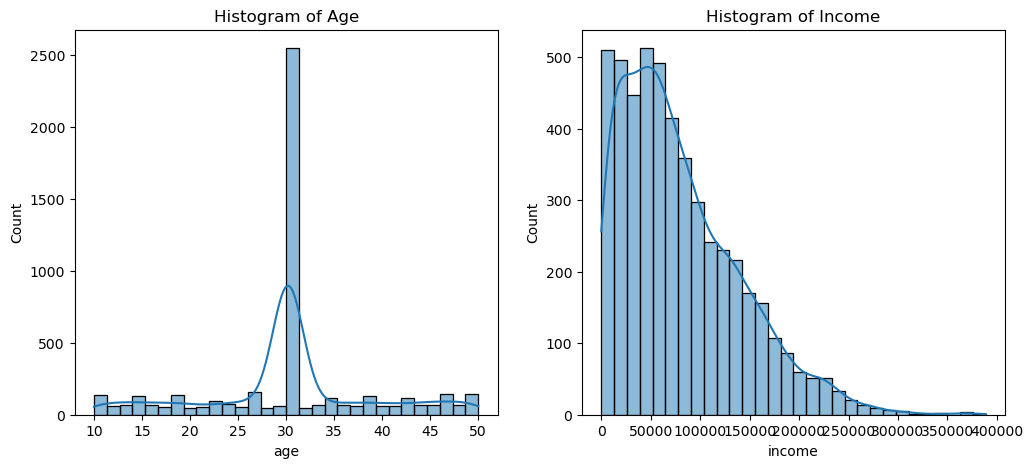

In [25]:
# Create histograms for 'age' and 'income'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['income'], bins=30, kde=True)
plt.title('Histogram of Income')

plt.show()


In [26]:
df.dtypes

index                 int64
id                    int64
age                 float64
gender               object
income                int64
days_on_platform    float64
city                 object
purchases             int64
dtype: object

In [27]:
(df == 0).sum()

index                  1
id                     1
age                    0
gender                 0
income                 0
days_on_platform       0
city                   0
purchases           1964
dtype: int64

In [28]:
# Calculate mean age
df['age'].mean()

30.202036021926393

In [29]:
df.shape

(5000, 8)

In [ ]:
df['days_on_platform'].median()